# Objective : Exploratory Data Analysis (minute - narrow)

### Importing the required Libraries ->

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Previewing the Dataset ->

In [41]:
data = pd.read_csv("G:\My Drive\Prepinsta - Data Analytics\Week 8 - Task 8\Master Datasets\minutely_merged_data_narrow.csv",index_col=0)
data.head()

,id,activityday,activitytime,calories,intensity,mets,steps
0,1503960366,2016-04-12,12:00:00,0.7865,0,10,0
1,1503960366,2016-04-12,12:01:00,0.7865,0,10,0
2,1503960366,2016-04-12,12:02:00,0.7865,0,10,0
3,1503960366,2016-04-12,12:03:00,0.7865,0,10,0
4,1503960366,2016-04-12,12:04:00,0.7865,0,10,0


- The dataset contains information related to physical activities, including calories,intensity,mets,steps on minute basis.

### Checking for Missing Values ->

In [42]:
data.isnull().sum()

id              0
activityday     0
activitytime    0
calories        0
intensity       0
mets            0
steps           0
dtype: int64

- Missing Values: There are no missing values in the dataset after the initial cleaning.

### Check for Duplicate values and remove if any ->

In [43]:
# chek if is there any duplicate values in dataset
duplicates = duplicates = data.duplicated().sum()
duplicates

0

- Duplicate Rows: There are no duplicate rows in the dataset.


### Descriptive Statistics ->

In [44]:
# Provide summary statistics
summary_statistics = data.describe()
summary_statistics

,id,calories,intensity,mets,steps
count,1.037209e+06,1.037209e+06,1.037209e+06,1.037209e+06,1.037209e+06
mean,4.879065e+09,1.759983e+00,2.561663e-01,1.597072e+01,6.818242e+00
std,2.408381e+09,1.562080e+00,5.743560e-01,1.334589e+01,2.024547e+01
min,1.503960e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.320127e+09,9.902200e-01,0.000000e+00,1.000000e+01,0.000000e+00
50%,4.558610e+09,1.263700e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,6.962181e+09,1.589380e+00,0.000000e+00,1.200000e+01,0.000000e+00
max,8.877689e+09,1.974995e+01,3.000000e+00,1.570000e+02,2.200000e+02


- Calories burned per minute range from 0 to nearly 19.75, indicating periods of inactivity and intense activity.

- The METs values range from 0 to 157, with a median at 10, indicating a wide range of activity levels from rest to very high exertion.

- On average, about 6.82 steps are taken per minute across all records, with a maximum of 220 steps in a minute.

### Activity Intensity Distribution ->

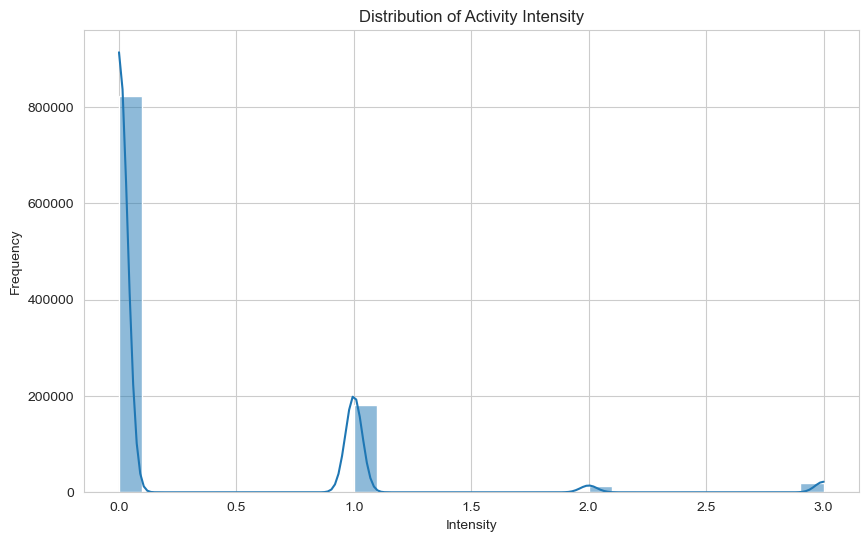

In [45]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of activity intensity
plt.figure(figsize=(10, 6))
sns.histplot(data['intensity'], bins=30, kde=True)
plt.title('Distribution of Activity Intensity')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

- There are notable intervals of low activity or rest during the bulk of the minutes that were recorded, with a peak at 0. Less medium-to-high intensity cases exist, which may indicate a decrease in the frequency of high-intensity activities.


### Calories Burned Distribution ->

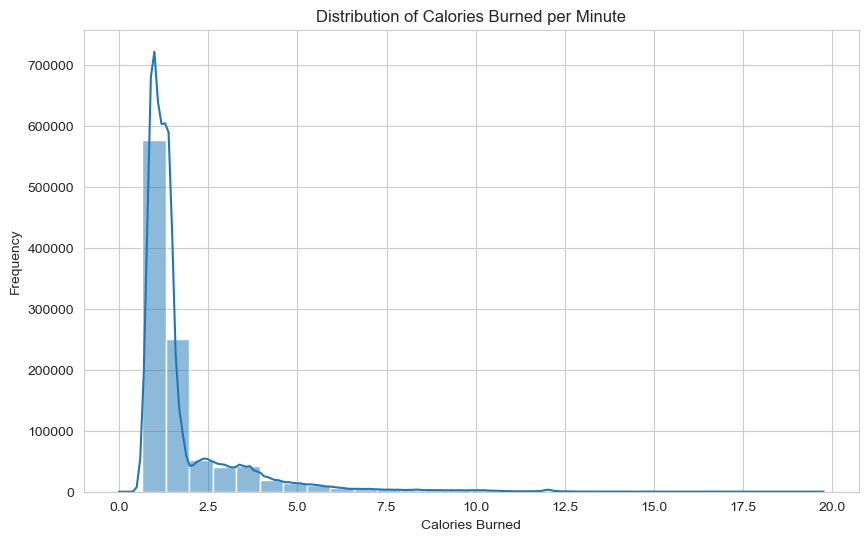

In [46]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of calories burned
plt.figure(figsize=(10, 6))
sns.histplot(data['calories'], bins=30, kde=True)
plt.title('Distribution of Calories Burned per Minute')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

- The distribution reveals that, on average, calories burned per minute are on the lower end, peaking at 1-2 calories per minute. Given that lower-intensity activities often burn less calories, this is consistent with the low intensity seen for the majority of the minutes.


### Steps Taken Distribution ->

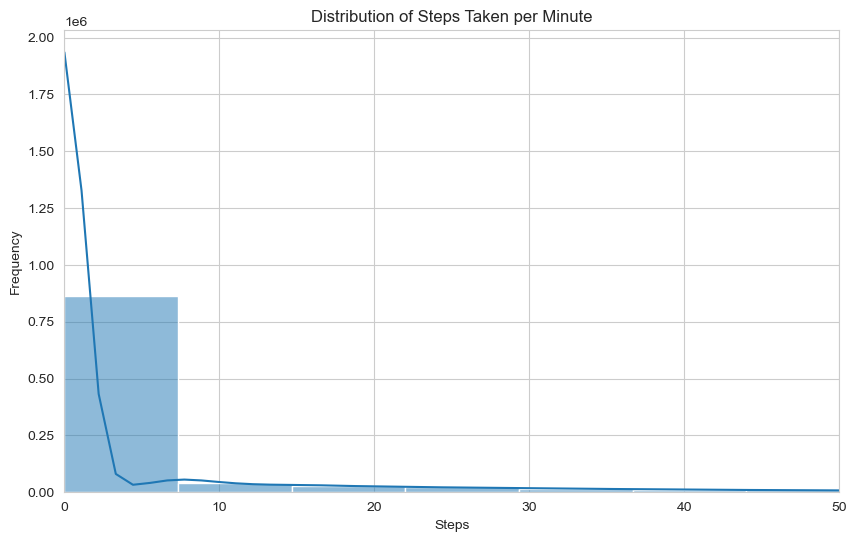

In [47]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of steps taken
plt.figure(figsize=(10, 6))
sns.histplot(data['steps'], bins=30, kde=True)
plt.title('Distribution of Steps Taken per Minute')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Limiting x-axis to focus on the common range of steps
plt.show()

- High levels of activity are not as common in this sample, as evidenced by the substantially lower frequency of minutes with higher step counts (beyond 10 steps per minut

### Time Series Analysis ->

In [48]:
# Temporary Convert 'activityday' to datetime format and 'activitytime' to a time object
data['activityday'] = pd.to_datetime(data['activityday'])
data['activitytime'] = pd.to_datetime(data['activitytime']).dt.time

# Aggregate the data on a daily basis
daily_activity = data.groupby('activityday').agg({
    'steps': 'sum',
    'intensity': 'mean',
    'calories': 'sum'
}).reset_index()

# Preview the aggregated daily data
daily_activity.head()

C:\Users\bhavs\AppData\Local\Temp\ipykernel_5892\436101486.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['activitytime'] = pd.to_datetime(data['activitytime']).dt.time


,activityday,steps,intensity,calories
0,2016-04-12,253794,0.252290,65085.678115
1,2016-04-13,227886,0.242094,61431.966911
2,2016-04-14,255084,0.254391,66436.708420
3,2016-04-15,246122,0.256119,66640.297213
4,2016-04-16,272087,0.279575,63611.403868


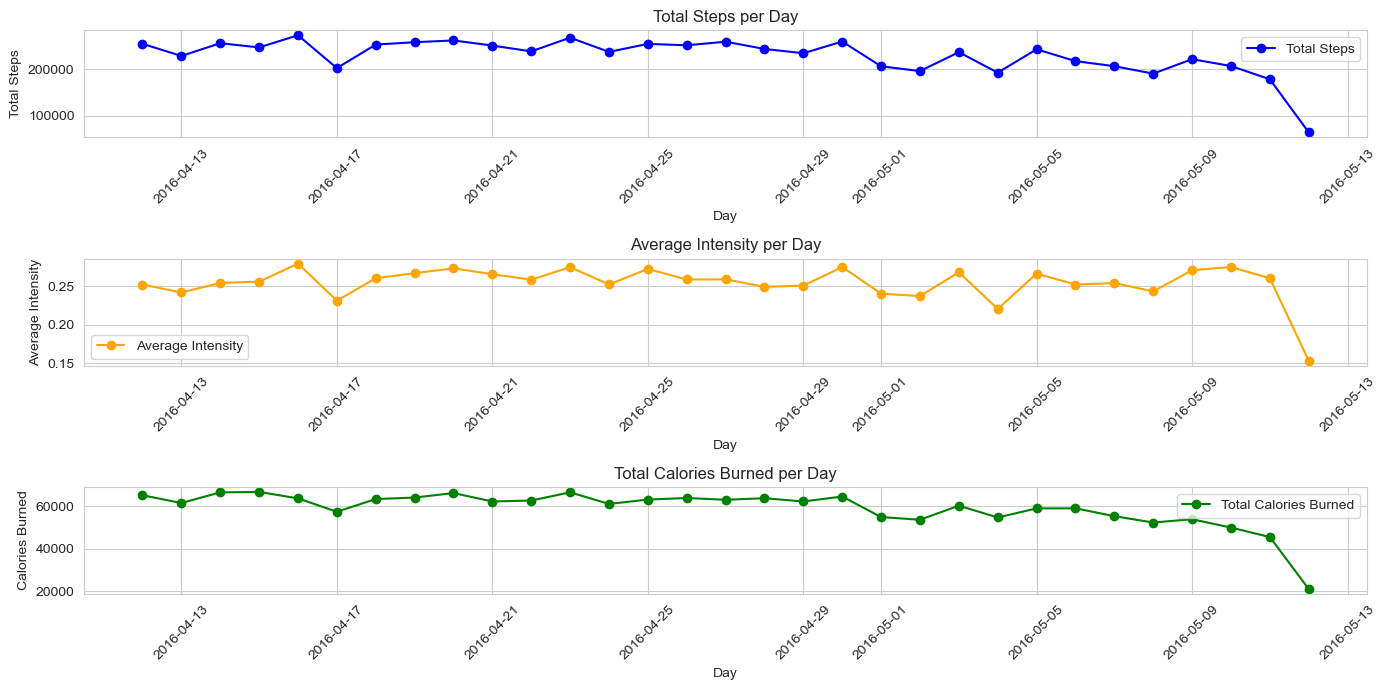

In [49]:
# Set the plot size
plt.figure(figsize=(14, 7))

# Plotting the total steps per day
plt.subplot(3, 1, 1)
plt.plot(daily_activity['activityday'], daily_activity['steps'], label='Total Steps', color='blue', marker='o')
plt.title('Total Steps per Day')
plt.xlabel('Day')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.legend()

# Plotting the average intensity per day
plt.subplot(3, 1, 2)
plt.plot(daily_activity['activityday'], daily_activity['intensity'], label='Average Intensity', color='orange', marker='o')
plt.title('Average Intensity per Day')
plt.xlabel('Day')
plt.ylabel('Average Intensity')
plt.xticks(rotation=45)
plt.legend()

# Plotting the total calories burned per day
plt.subplot(3, 1, 3)
plt.plot(daily_activity['activityday'], daily_activity['calories'], label='Total Calories Burned', color='green', marker='o')
plt.title('Total Calories Burned per Day')
plt.xlabel('Day')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


- **Total Steps Taken Daily:** The users' daily step totals remain mostly unchanged, suggesting a steady state of physical activity. As the observation period comes to an end, there is a tiny drop.

- **Average Intensity per Day:** Although it varies a little bit from day to day, the average intensity of activity stays mostly constant. There is a clear drop towards the end of the period, indicating a drop in the intensity of the activity.

- **Total Calories Burned per Day:** Compared to the other metrics, the total calories burned per day varies less, indicating that the duration and intensity of the activities are largely constant. The overall number of calories burned shows a declining tendency as the period comes to a conclusion, much as the steps and intensity.

### User-Level Analysis ->

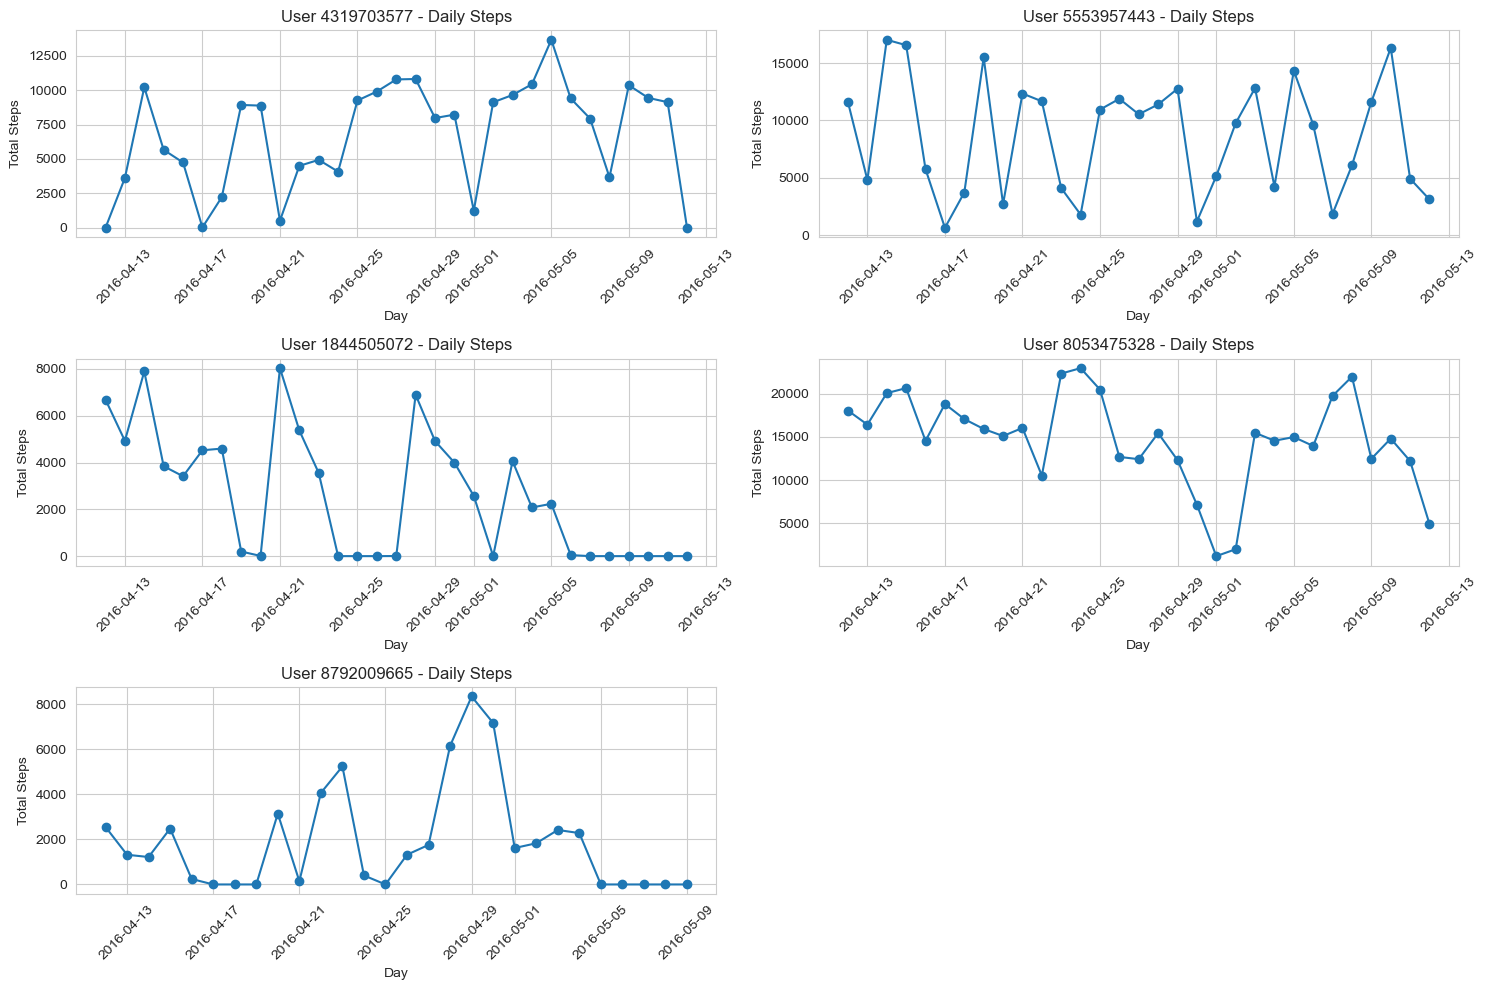

In [50]:
# Aggregate the data on a daily basis for each user
user_daily_activity = data.groupby(['id', 'activityday']).agg({
    'steps': 'sum',
    'intensity': 'mean',
    'calories': 'sum'
}).reset_index()

# Select a subset of unique users for detailed analysis
# We'll take a sample of 5 users for demonstration purposes
sample_users = user_daily_activity['id'].drop_duplicates().sample(5, random_state=1)

# Filter the data for these selected users
sample_user_data = user_daily_activity[user_daily_activity['id'].isin(sample_users)]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot activity patterns for each selected user
for i, user_id in enumerate(sample_users, 1):
    plt.subplot(3, 2, i)
    user_data = sample_user_data[sample_user_data['id'] == user_id]
    plt.plot(user_data['activityday'], user_data['steps'], marker='o')
    plt.title(f'User {user_id} - Daily Steps')
    plt.xlabel('Day')
    plt.ylabel('Total Steps')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Plots like these highlight how different users' activity habits are; some have more consistency in their daily step counts, while others have a lot of variety. 

- Understanding the effects of lifestyle modifications on physical activity or creating individualized exercise recommendations can both benefit from these knowledge. 

### Correlation Analysis ->

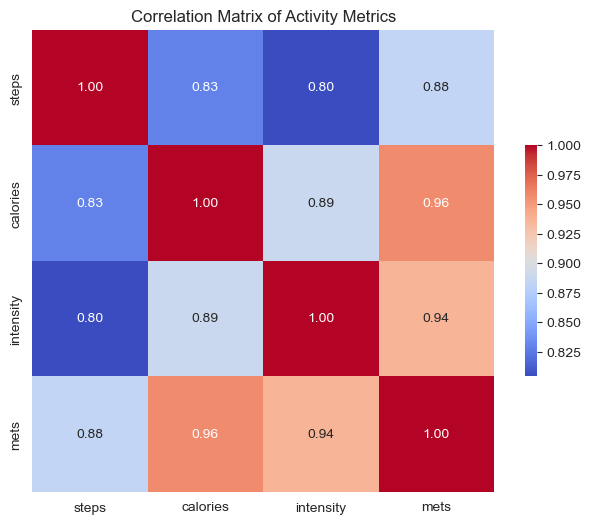

In [51]:
# Calculate the correlation matrix for the 'steps', 'calories', 'intensity', and 'mets' columns
correlation_matrix = data[['steps', 'calories', 'intensity', 'mets']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Activity Metrics')
plt.show()


- These robust correlations support the intuitive associations between physical activity measurements, which state that energy expenditure (METs, calories) increases with increasing activity level (steps, intensity). 

- We can cluster individuals or activity sessions based on shared metrics attributes thanks to the strong foundation this analysis provides.

### Activity clustering ->

In [52]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Selecting features for clustering
features = daily_activity[['steps', 'intensity', 'calories']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

c:\Users\bhavs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


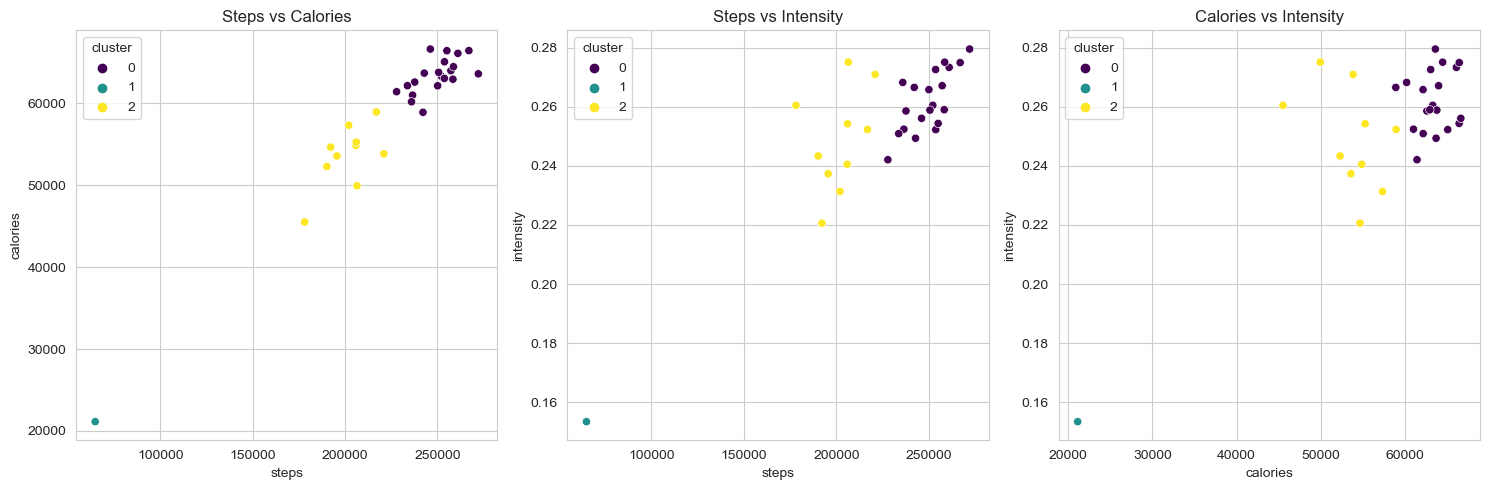

In [53]:

# We will use 3 clusters for this demonstration
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster information to the original daily_activity dataframe
daily_activity['cluster'] = clusters

# Visualize the clusters by creating scatter plots for each pair of features
plt.figure(figsize=(15, 5))

# Scatter plot for steps and calories
plt.subplot(1, 3, 1)
sns.scatterplot(x='steps', y='calories', hue='cluster', data=daily_activity, palette='viridis')
plt.title('Steps vs Calories')

# Scatter plot for steps and intensity
plt.subplot(1, 3, 2)
sns.scatterplot(x='steps', y='intensity', hue='cluster', data=daily_activity, palette='viridis')
plt.title('Steps vs Intensity')

# Scatter plot for calories and intensity
plt.subplot(1, 3, 3)
sns.scatterplot(x='calories', y='intensity', hue='cluster', data=daily_activity, palette='viridis')
plt.title('Calories vs Intensity')

plt.tight_layout()
plt.show()

- The clusters in the **"Steps vs. Calories"** figure appear to be mostly organized by the quantity of steps taken and the associated calories burned. This implies that various amounts of everyday activity may be represented by these groups.

- The **"Steps vs. Intensity"** graphic shows that the average intensity of the activities as well as the number of steps distinguish various clusters.

- Ultimately, the **"Calories vs. Intensity"** map demonstrates that the activity intensity and total calories burned are clearly correlated, with the clusters being well separated.

### Day of the Week trends ->

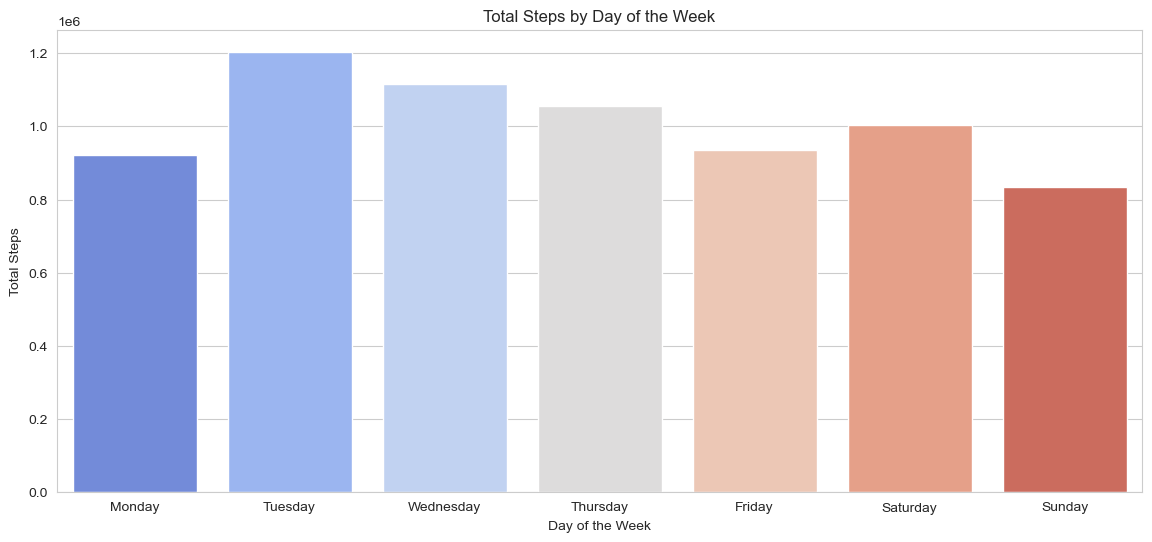

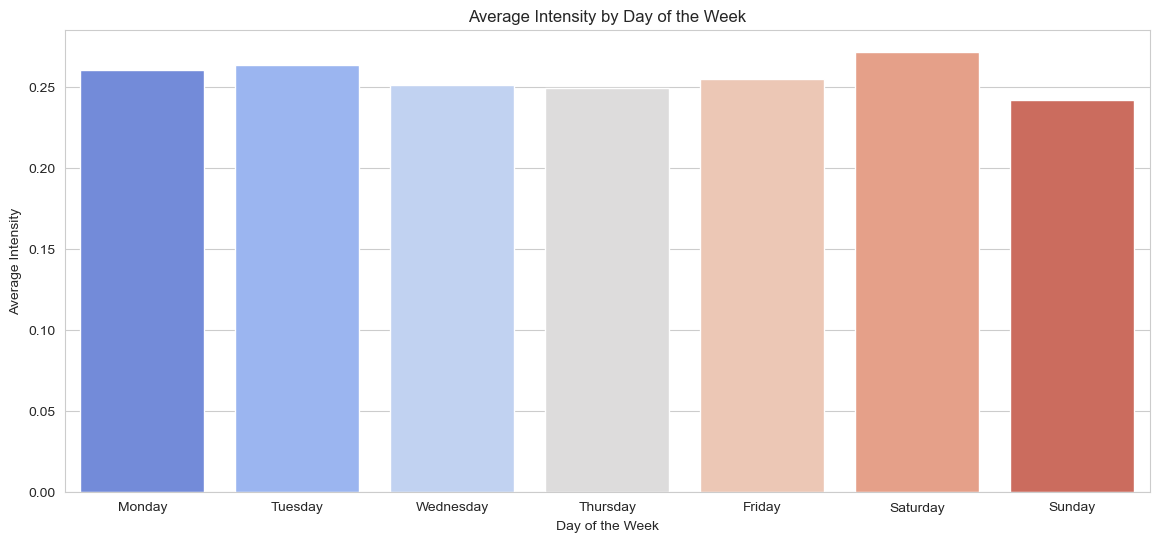

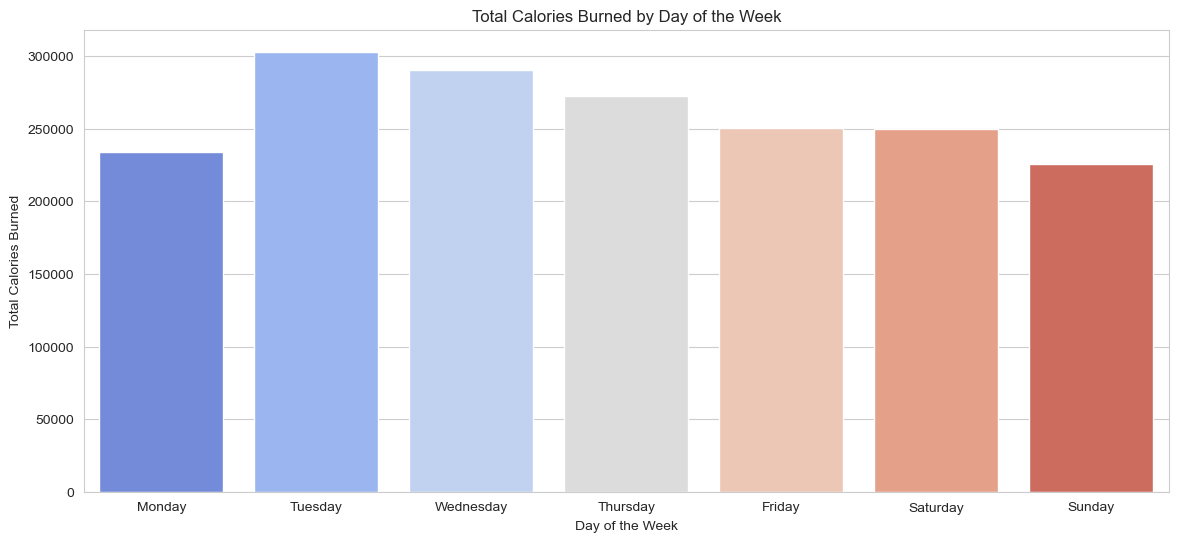

In [54]:
# Convert 'activityday' to datetime format
data['activityday'] = pd.to_datetime(data['activityday'])

# Extract day of the week from 'activityday' (0=Monday, 6=Sunday)
data['day_of_week'] = data['activityday'].dt.dayofweek

# Map the day of the week to actual names for clarity in visualization
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
        4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_name'] = data['day_of_week'].map(days)

# Aggregate the data by day of the week
weekly_activity = data.groupby('day_name').agg({
    'steps': 'sum',
    'intensity': 'mean',
    'calories': 'sum'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Reset index to plot with seaborn
weekly_activity = weekly_activity.reset_index()

# Plotting the weekly activity trends
plt.figure(figsize=(14, 6))

# Plot for average steps by day of the week
sns.barplot(x='day_name', y='steps', data=weekly_activity, palette='coolwarm')
plt.title('Total Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.show()

# Plot for average intensity by day of the week
plt.figure(figsize=(14, 6))
sns.barplot(x='day_name', y='intensity', data=weekly_activity, palette='coolwarm')
plt.title('Average Intensity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Intensity')
plt.show()

# Plot for total calories by day of the week
plt.figure(figsize=(14, 6))
sns.barplot(x='day_name', y='calories', data=weekly_activity, palette='coolwarm')
plt.title('Total Calories Burned by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Calories Burned')
plt.show()


- Some days show higher totals, which could correlate with days when users are more active due to work or personal exercise routines.

- The average intensity levels appear to vary slightly by day, which may indicate that users engage in more vigorous activities on certain days of the week.

- Some days showing higher calorie expenditure. This could be due to more intense or prolonged physical activity on these days.

## Conclusion

- Activity levels fluctuate across hours of the day and days of the week, with notable peaks during certain times likely reflecting common routines such as morning exercises or evening walks. 

- Weekends and specific weekdays exhibit different activity levels, suggesting variations in users' schedules and commitments.

- User-level analysis underscores the personalized nature of physical activity and the potential need for customized fitness recommendations.

- Clustering analysis helped identify groups of days or users with similar activity levels, offering a way to segment the data based on activity behaviors